In [1]:
import os
import time
import torch
from bigdl.llm.transformers import AutoModel
from transformers import AutoTokenizer

model_path = os.environ.get('LLM_MODEL_PATH')
model = AutoModel.from_pretrained(model_path, trust_remote_code=True, load_in_4bit=True)
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)

Loading checkpoint shards: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


In [2]:
input_str = "Give me a text prompt to generate an image of a castle\n\n"
with torch.inference_mode():
    st = time.time()
    input_ids = tokenizer.encode(input_str, return_tensors="pt")
    output = model.generate(input_ids, do_sample=False, max_new_tokens=64)
    output_str = tokenizer.decode(output[0], skip_special_tokens=True)
    end = time.time()
print('Prompt:', input_str)
print('Output:', output_str)
print(f'Inference time: {end-st} s')

Prompt: Give me a text prompt to generate an image of a castle


Output: Give me a text prompt to generate an image of a castle

A text prompt to generate an image of a castle could be:

"Please generate an image of a medieval castle with a moat surrounding it. The castle should have a tall, thick walls, a narrow entrance, and multiple towers. The scene should be set in a forested or rural area with tall trees
Inference time: 7.443804025650024 s


Loading the existing cache from C:\dev\ftp\sd\models--runwayml--stable-diffusion-v1-5\snapshots\39593d5650112b4cc580433f6b0435385882d819\unet\float16_openvino to GPU
Compile model and create infer request took 13490.59 ms
Load unet in 14.712667999999951s


100%|██████████| 10/10 [00:03<00:00,  2.56it/s]


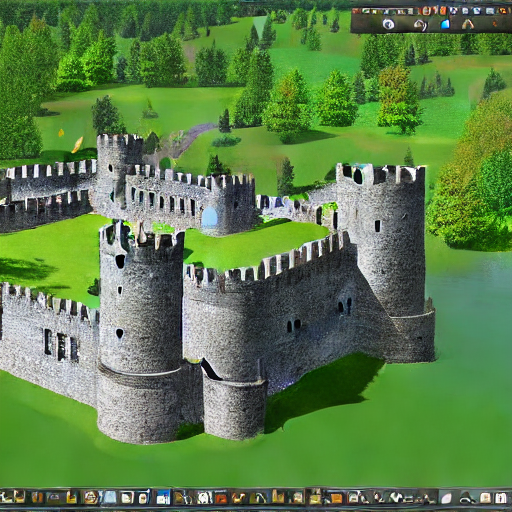

In [5]:
prompt = output_str.split('"')[-1]
from bigdl_diffusion.diffusers.pipelines import *
pipe = NanoStableDiffusionPipeline.from_pretrained(os.getenv('SD_MODEL_PATH'), device='GPU', backend='ov')
output = pipe(prompt, num_inference_steps=10).images[0]
output.save('castle.jpg')

from IPython.display import display
display(output)